Prediction of Spot Heights of Earth Surface using Nothing and Easting Values Datasets.

Methodology:
The data was collected using  topographic survey techniques. The dataset represents data obtained from the topographic survey of the University of Lagos Nigeria Terrains. It is made up of 9300+ instances having Nothing, Easting, and spot height values. The dataset is in CSV format. No missing data.
The objective of this project is to use the datasets to develop a digital models that can capture relationships among the  Easting, Nothing feature values and the target Spot Heights using Machine Learning Regression Techniques. The final model is expected to predict spot height in meters of any point on Earth surface with defined Easting and Northing values 

In [15]:
 #import tools
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as pl
import numpy as n
import os
import seaborn as sn
#import data from local file
data=open('F:\TOPO_DATA.csv')

#Read data using pandas' read_csv method
Topo_Data=pd.read_csv(data, index_col='S/N')

#Change Columns' names
Topo_Data.columns=['Easting','Northing','Spot_Height']

#View data
Topo_Data.head(5)

,Easting,Northing,Spot_Height
S/N,,,
1,544079.776,720172.309,1.012
2,543279.402,720468.302,1.021
3,543279.472,720468.390,1.025
4,542778.571,720464.031,1.032
5,544080.839,720170.246,1.046


In [16]:
#Check Nunmber of instances
print('Number of instances, No of features')
Topo_Data.shape[0],Topo_Data.shape[1]

Number of instances, No of features


(9373, 3)

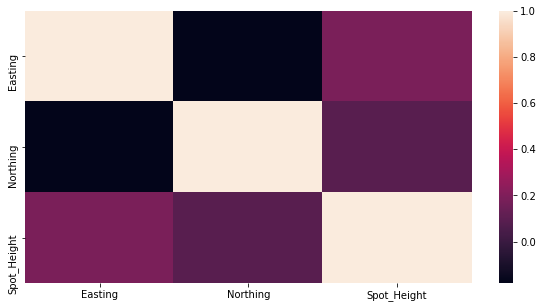

In [17]:
#Explore the data through visualization
pl.figure(figsize=(10,5))
sn.heatmap(Topo_Data.corr(),cbar=True)
pl.show()


There is no strong correlation among the variables as depicted with the heatmap above

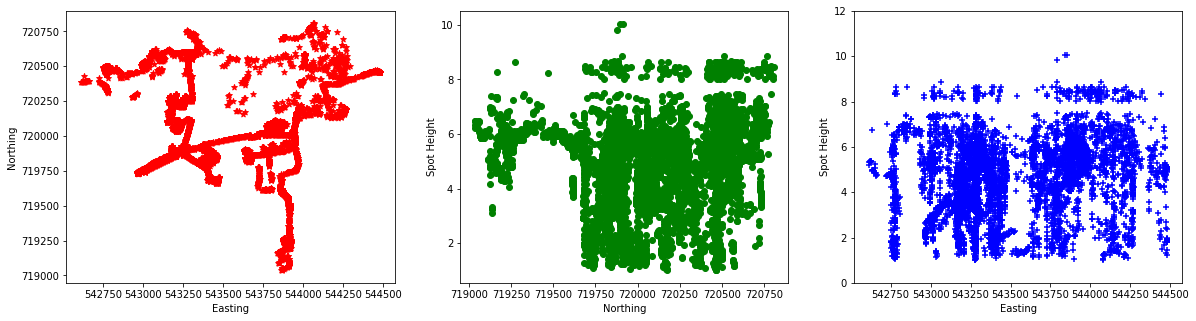

In [18]:
#Plots to explore the relationships among variables
pl.figure(figsize=(20,5))
pl.subplot(1,3,3)
pl.ylabel("Spot Height")
pl.xlabel('Easting')
pl.scatter(list(Topo_Data['Easting'].values),list(Topo_Data['Spot_Height'].values), c="blue", marker='+')
pl.ylim(0,12)
pl.subplot(132)
pl.ylabel("Spot Height")
pl.xlabel('Northing')
pl.scatter(list(Topo_Data['Northing'].values),list(Topo_Data['Spot_Height'].values), c="green", marker='o')
pl.subplot(131)
pl.ylabel("Northing")
pl.xlabel('Easting')
pl.scatter(list(Topo_Data['Easting'].values),list(Topo_Data['Northing'].values), c="red", marker='*')
pl.show()



There is salient non-linear relationship among those variables defining the data based on the above figures

In [19]:
#Create data split function
def data_split(data):
    random_state=1
    Split_idx=n.random.permutation(len(data))
    n_ins=int(0.20*len(data))#no of instances
    Test_idx=Split_idx[:n_ins]
    Train_idx=Split_idx[n_ins:]
    return data.iloc[Train_idx],data.iloc[Test_idx]

#split data into train, validate, test datasets
Train_data,Test_Data=data_split(Topo_Data)
#shapes of various datasets
Test_Data.shape,Train_data.shape,Topo_Data.shape

((1874, 3), (7499, 3), (9373, 3))

In [20]:
#Create validation data from Train_data
Remain_Train_data,Val_data=data_split(Train_data)
#Val_data.shape,Remain_Train_data.shape

#split datasets into feature dataset and target dataset
Train_target=Remain_Train_data["Spot_Height"].values
cols=["Easting","Northing"]
Train_features=Remain_Train_data[cols].values

#validation data 
Val_target=Val_data["Spot_Height"].values
Val_features=Val_data[cols].values
#shapes of target datasets
Val_target.shape,Train_target.shape

((1499,), (6000,))

In [21]:
#Normalizing the datasets for easy model training and effective model performance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_fit=scaler.fit(Train_features)
Normalized_Train=scaler_fit.transform(Train_features)
Normalized_val=scaler_fit.transform(Val_features)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
tr_data=PolynomialFeatures(degree=90)
Mod_=LinearRegression()
tr_data.fit_transform(Normalized_Train)
Y_=Mod_.fit(Normalized_Train,Train_target).predict(Normalized_val)
pre_t=Mod_.predict(Normalized_Train)

In [23]:
Train_MSE,Validation_MSE=mean_squared_error(Train_target,pre_t),mean_squared_error(Val_target,Y_)
print('Train_MSE: %.4f   Validation_MSE: %.4f'%(Train_MSE,Validation_MSE))

Train_MSE: 2.3336   Validation_MSE: 2.2952


In [24]:
#Train stochastic gradient Regression model
from sklearn.linear_model import SGDRegressor
#create an instance of the Regression Class
lreg=SGDRegressor(alpha=0.01,eta0=0.01,epsilon=10)
#fit the model
lreg.fit(Normalized_Train,Train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=10,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [25]:
# Print the model coefficients ang intercept
print(lreg.coef_,lreg.intercept_)
print('r2 score: %f'% lreg.score(Normalized_Train,Train_target))


[0.33610251 0.19364347] [4.66899716]
r2 score: 0.050934


In [26]:
#Validate model by predicting validation target dataset
y_hat=lreg.predict(Normalized_val)
for i in range(5):
    print('Validation Target %f, Predicted %f' %(Val_target[i],y_hat[i]))

Validation Target 4.440000, Predicted 4.538677
Validation Target 5.250000, Predicted 4.833940
Validation Target 6.903000, Predicted 5.175025
Validation Target 10.040000, Predicted 4.838089
Validation Target 6.638000, Predicted 4.836966


In [27]:
pred_v=lreg.predict(Normalized_val)
pre_t=lreg.predict(Normalized_Train)
Train_MSE,Validation_MSE=mean_squared_error(Train_target,pre_t),mean_squared_error(Val_target,pred_v)
print('Train_MSE: %.4f   Validation_MSE: %.4f'%(Train_MSE,Validation_MSE))

Train_MSE: 2.3341   Validation_MSE: 2.2959


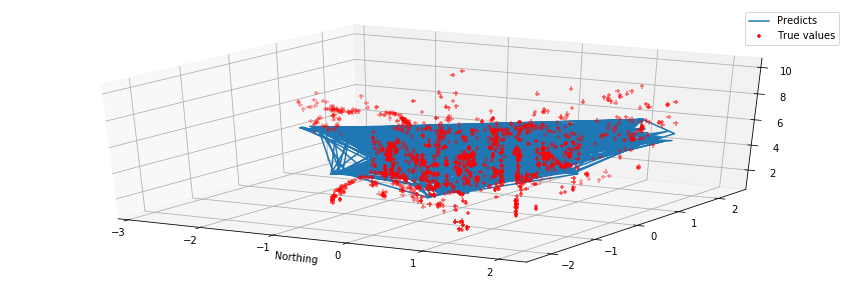

In [28]:
fig=pl.figure(figsize=(15,5))
ax=fig.gca(projection='3d')
ax.scatter(list(Normalized_val[:,1]),list(Normalized_val[:,0]),Val_target,marker='+',color='red',label="True values")
ax.plot(list(Normalized_val[:,1]),list(Normalized_val[:,0]),y_hat,label="Predicts")
ax.set_xlabel('Northing')
pl.legend()
pl.show()

In [29]:
#A trial with SVM Regressor
from sklearn.svm import SVR
svr_model=SVR(gamma=2000, C=10.0)
svr_model.fit(Normalized_Train,Train_target)
pred_v=svr_model.predict(Normalized_val)
pre_t=svr_model.predict(Normalized_Train)
Train_MSE,Validation_MSE=mean_squared_error(Train_target,pre_t),mean_squared_error(Val_target,pred_v)
print('Train_MSE: %.4f   Validation_MSE: %.4f'%(Train_MSE,Validation_MSE))

Train_MSE: 0.2900   Validation_MSE: 0.6581


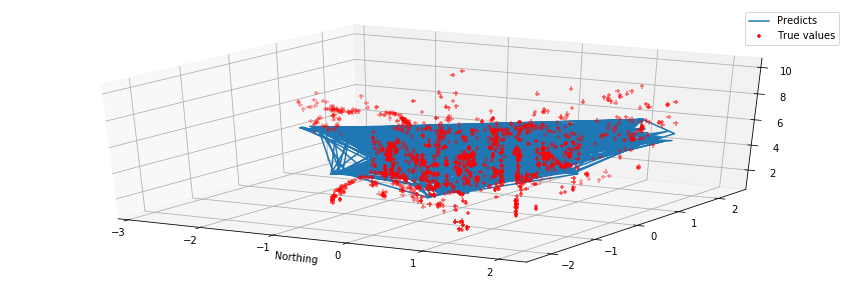

In [30]:
# A 3D view of distribution of predicts againdt true value
fig=pl.figure(figsize=(15,5))
ax=fig.gca(projection='3d')
ax.scatter(list(Normalized_val[:,1]),list(Normalized_val[:,0]),Val_target,marker='+',color='red',label="True values")
ax.plot(list(Normalized_val[:,1]),list(Normalized_val[:,0]),y_hat,label="Predicts")
ax.set_xlabel('Northing')
pl.legend()
pl.show()

In [33]:
#View of True values against the predicted by SVM regressor
y_hat=svr_model.predict(Normalized_val)
Value_Set_SVM={'True Value':Val_target,'Predicts':pred_v}
pd_View=pd.DataFrame(Value_Set_SVM)
pd_View.tail(5)

,True Value,Predicts
1494,3.639,3.860976
1495,4.566,4.463656
1496,2.909,3.016043
1497,1.256,2.111427
1498,3.623,3.469274


In [34]:
# A trial with RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(max_depth=30,n_estimators=100,random_state=11)
y_hat_r=model.fit(Normalized_Train,Train_target)
pred_v=model.predict(Normalized_val)
pre_t=model.predict(Normalized_Train)
Train_MSE,Validation_MSE=mean_squared_error(Train_target,pre_t),mean_squared_error(Val_target,pred_v)
print('Train_MSE: %.4f   Validation_MSE: %.4f'%(Train_MSE,Validation_MSE))

Train_MSE: 0.0929   Validation_MSE: 0.6190


In [38]:
Value_Set={'True Value':Val_target,'Predicts':pred_v}
pd_View2=pd.DataFrame(Value_Set)
pd_View2.tail(5)

,True Value,Predicts
1494,3.639,4.01889
1495,4.566,4.55469
1496,2.909,3.13345
1497,1.256,2.40515
1498,3.623,3.43674


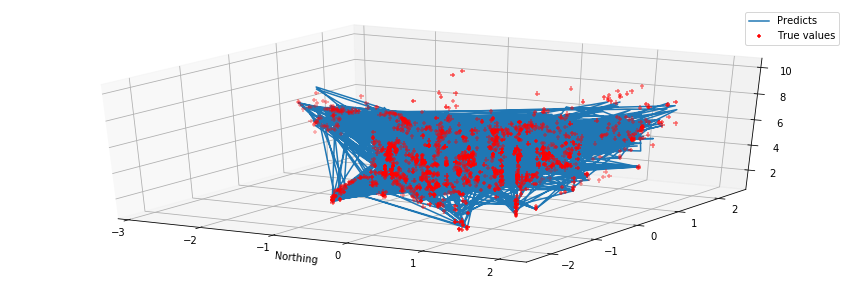

In [42]:
fig=pl.figure(figsize=(15,5))
ax=fig.gca(projection='3d')
ax.scatter(list(Normalized_val[:,1]),list(Normalized_val[:,0]),Val_target,marker='+',color='red',label="True values")
ax.plot(list(Normalized_val[:,1]),list(Normalized_val[:,0]),pred_v,label="Predicts")
ax.set_xlabel('Northing')
pl.legend()
pl.show()


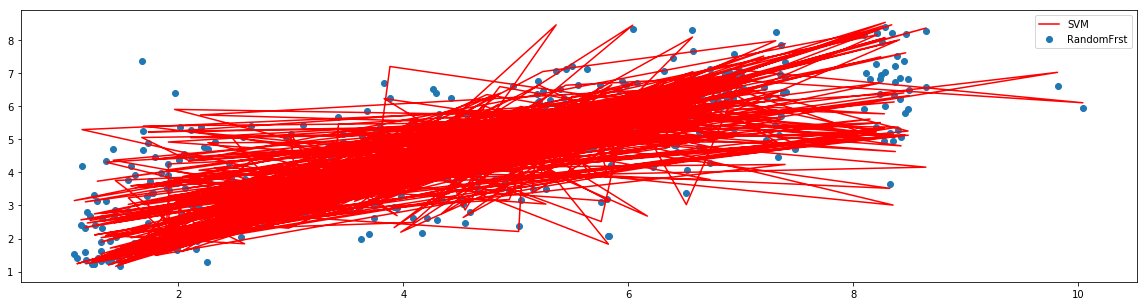

In [43]:
#Comparison of performance of SVR and RandomForest Models
fig=pl.figure(figsize=(20,5))
pl.plot(list(pd_View['True Value'].values),list(pd_View['Predicts'].values),color='red',label="SVM")
pl.scatter(list(pd_View['True Value'].values),list(pd_View2['Predicts'].values),label='RandomFrst')
pl.legend()
pl.show()


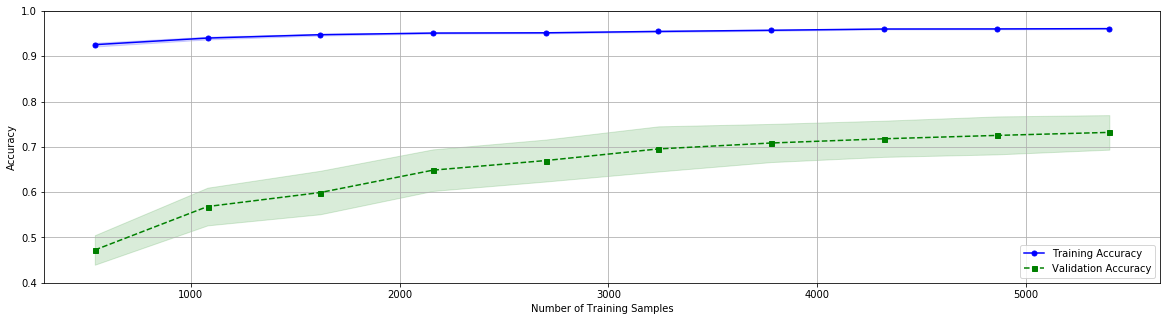

In [58]:
#It seems RandomForestRegressor is promising
#Validation of RandomForestRegresor model using Cross-validation

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =learning_curve(estimator=model,X=Normalized_Train,y=Train_target,train_sizes=n.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)
train_mean = n.mean(train_scores, axis=1)
train_std = n.std(train_scores, axis=1)
test_mean = n.mean(test_scores, axis=1)
test_std = n.std(test_scores, axis=1)
pl.figure(figsize=(20,5))
pl.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training Accuracy')
pl.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
pl.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation Accuracy')
pl.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
pl.grid()
pl.xlabel('Number of Training Samples')
pl.ylabel('Accuracy')
pl.legend(loc='lower right')
pl.ylim([0.4, 1.0])
pl.show()

There is sense of overfitting of the randomforest regressor model as shown in the learning curves above

In [45]:
#Optimization of RandomForest Model
from sklearn.model_selection import GridSearchCV
n_estimators = [10,100,300,500]
max_depth = [10,20,30,50] 
#Create dictionary hyperparameter candidates
hyperparameters={'max_depth':max_depth, 'n_estimators':n_estimators}
# Create grid search
gridsearch = GridSearchCV(model, hyperparameters, cv=10, verbose=0)
# Fit grid search
best_model = gridsearch.fit(Normalized_Train,Train_target)

In [46]:
#Testing phase: 
print('Best No of Estimator:' , best_model. best_estimator_. get_params()['n_estimators' ])
print('Best Max Dept:' , best_model.best_estimator_. get_params()['max_depth' ])
Test_features=Test_Data[cols]
Test_targets=Test_Data["Spot_Height"].values
N_test_data=scaler_fit.transform(Test_features)
Predicts=best_model.predict(N_test_data)
Test_predict_MSE=mean_squared_error(Test_targets,Predicts)
print('Test data MSE: %.2f'% Test_predict_MSE)

Best No of Estimator: 300
Best Max Dept: 20
Test data MSE: 0.52


In [59]:
#RandomForestRegressor model tested with Out-Of-Vocabulary dataset
Value_Set={'True Value':Test_targets,'Predicts':Predicts}
pd_View3=pd.DataFrame(Value_Set)
pd_View3.tail()

,True Value,Predicts
1869,6.473,6.785429
1870,5.524,5.457965
1871,5.323,5.095523
1872,4.306,4.436321
1873,1.215,1.308257


In [48]:
#Test model on Train dataset
best_model.predict(Normalized_Train)[:10],Train_target[:10]

(array([3.29641174, 5.79480995, 3.34230069, 1.99597333, 4.62114667,
        5.86645413, 6.71819983, 3.95266127, 1.94933417, 5.59055039]),
 array([3.285, 5.208, 3.243, 2.003, 4.366, 6.404, 8.191, 3.953, 1.946,
        5.485]))

In [49]:
#save the best model for the prediction of spot height in meters using easting and Northing values as Topographic_model

from sklearn.externals import joblib
joblib.dump(best_model,"Topographic_model.pkl" )

['Topographic_model.pkl']

Thanks for taking your time to read the work!

In [53]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']